In [158]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from src.mlp import MLP, Layer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
x_train = np.linspace(-1, 1, 100).reshape(1, -1)
y_train = 3 * np.sin(-x_train * 6) + x_train * 5

<Axes: >

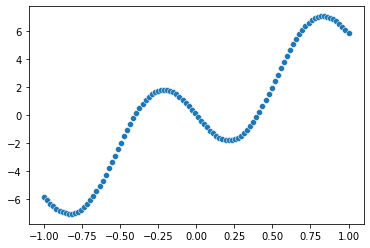

In [17]:
sns.scatterplot(x=x_train.reshape(100),y=y_train.reshape(100))

In [ ]:
model = MLP(layers=[
    Layer(1, 6, activation="sigmoid"),
    Layer(6, 1, activation="linear"),
])
model.fit(x_train, y_train, learning_rate=0.01)

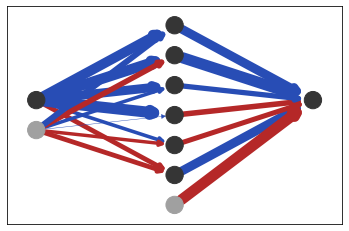

In [ ]:
model.plot()

In [ ]:
y_predicted = model.predict(x_train)
mean_squared_error(y_train, y_predicted)

0.01682715692825112

<Axes: >

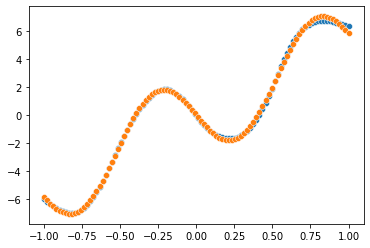

In [ ]:
sns.scatterplot(x=x_train.reshape(100),y=y_predicted.reshape(100))
sns.scatterplot(x=x_train.reshape(100),y=y_train.reshape(100))

In [31]:
df_training = pd.read_csv("data/mio1/regression/square-simple-training.csv.csv", index_col=0)
df_test = pd.read_csv("data/mio1/regression/square-simple-test.csv.csv", index_col=0)

NameError: name 'pd' is not defined

In [153]:
x_train = df_training['x'].values.reshape(1, 10000)
y_train = df_training['y'].values.reshape(1, 10000) / 1

In [159]:
model = MLP(layers=[
    Layer(1, 4),
    Layer(4, 1, activation="linear")
])
model.fit(x_train, y_train, learning_rate=0.001, verbose=1)

iteration: 0/1000
iteration: 1/1000
iteration: 2/1000
iteration: 3/1000
iteration: 4/1000
iteration: 5/1000
iteration: 6/1000
iteration: 7/1000
iteration: 8/1000
iteration: 9/1000
iteration: 10/1000
iteration: 11/1000
iteration: 12/1000
iteration: 13/1000
iteration: 14/1000
iteration: 15/1000
iteration: 16/1000
iteration: 17/1000
iteration: 18/1000
iteration: 19/1000
iteration: 20/1000
iteration: 21/1000
iteration: 22/1000
iteration: 23/1000
iteration: 24/1000
iteration: 25/1000
iteration: 26/1000
iteration: 27/1000
iteration: 28/1000
iteration: 29/1000
iteration: 30/1000
iteration: 31/1000
iteration: 32/1000
iteration: 33/1000
iteration: 34/1000
iteration: 35/1000
iteration: 36/1000
iteration: 37/1000
iteration: 38/1000
iteration: 39/1000
iteration: 40/1000
iteration: 41/1000
iteration: 42/1000
iteration: 43/1000
iteration: 44/1000
iteration: 45/1000
iteration: 46/1000
iteration: 47/1000
iteration: 48/1000
iteration: 49/1000
iteration: 50/1000
iteration: 51/1000
iteration: 52/1000
ite

In [160]:
y_predicted = model.predict(x_train)
mean_squared_error(y_train, y_predicted)

15.796492041385834

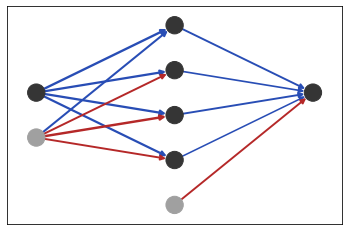

In [161]:
model.plot(log_weights=True)

<Axes: >

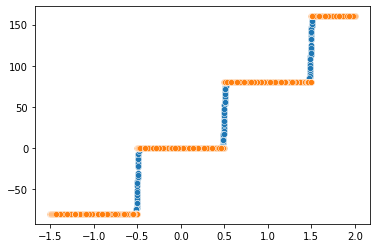

In [163]:
sns.scatterplot(x=x_train.reshape(10000),y=y_predicted.reshape(10000))
sns.scatterplot(x=x_train.reshape(10000),y=y_train.reshape(10000))

In [27]:
import tensorflow as tf
import numpy as np
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [20]:
A = np.random.random(size=(5000, 5000))
B = np.random.random(size=(5000, 5000))

In [21]:
%%timeit
A @ B

2.66 s ± 110 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [61]:
import tensorflow as tf
import numpy as np


A = np.random.randn(3000, 3000)
B = np.random.randn(3000, 3000)
A_ = tf.Variable(A)
B_ = tf.Variable(B)

AB_ = A_ @ B_

%timeit np.matmul(A, B)
%timeit AB_

801 ms ± 30.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
71.5 ns ± 21 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [62]:
%%timeit
A + 1

41.8 ms ± 3.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [63]:
%%timeit
A_.assign(A_ + 1)

1.81 ms ± 5.37 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
